In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def read_all_sheets_from_excel(path: str) -> dict:
    import pandas as pd
    xls = pd.ExcelFile(path)
    df_dict = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
    return df_dict

# Load the first file
model_annotations_dataframes = read_all_sheets_from_excel('data/model_annotations_liwc_h.xlsx')
print("Dataframes in model_annotations_liwc_h.xlsx:", ", ".join(model_annotations_dataframes.keys()))

# Load the second file
r1_r2_annotations_dataframes = read_all_sheets_from_excel('data/r1_r2_annotations_liwc_h.xlsx')
print("Dataframes in r1_r2_annotations_liwc_h.xlsx:", ", ".join(r1_r2_annotations_dataframes.keys()))

# Display the head of each dataframe to understand their structure
print('Head of model_annotations_liwc_h.xlsx Sheet0:')
print(model_annotations_dataframes['Sheet0'].head())

print('\
Head of r1_r2_annotations_liwc_h.xlsx Sheet0:')
print(r1_r2_annotations_dataframes['Sheet0'].head())

r1_r2_annotations_df = r1_r2_annotations_dataframes['Sheet0']
# Filter rows where majority_vote is 'NoMajority'
no_majority_df = r1_r2_annotations_df[r1_r2_annotations_df['majority_vote'] == 'NoMajority']

# Display the head of the filtered dataframe to understand its structure
print(no_majority_df.head())


# Calculate the mean of LIWC features for 'NoMajority' tweets
descriptive_stats = no_majority_df.describe().transpose()

# Filter for relevant LIWC categories (Social, Affect, Cognition, and Tone)
relevant_categories = ['Social', 'Affect', 'Cognition', 'Tone']
relevant_stats = descriptive_stats.loc[descriptive_stats.index.isin(relevant_categories)]

print(relevant_stats)

Dataframes in model_annotations_liwc_h.xlsx: Sheet0


d:\Library\Downloads\Documents\School\SUPSI_23-24\hackathon_2\project\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Dataframes in r1_r2_annotations_liwc_h.xlsx: Sheet0
Head of model_annotations_liwc_h.xlsx Sheet0:
                                                text  \
0  Dear World:family_man_woman_girl_boy:, you nee...   
1  .@fordnation says releasing the projection mod...   
2  "Neurologists around the world say that a smal...   
3  Coronavirus: More than one million cases confi...   
4  This is my Gov, @henrymcmaster, today, 4/2/202...   

                                           proc_text model_unanimous  Segment  \
0  Dear World:family_man_woman_girl_boy:, you nee...              PO        1   
1  .@fordnation says releasing the projection mod...              PO        1   
2  "Neurologists around the world say that a smal...              UN        1   
3  Coronavirus: More than one million cases confi...              UN        1   
4  This is my Gov, @henrymcmaster, today, 4/2/202...              UN        1   

   WC  Analytic  Clout  Authentic   Tone   WPS  ...  nonflu  filler  AllPunc  

C:\Users\kaisb\AppData\Local\Temp\ipykernel_27296\1948204145.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=means, palette='coolwarm')


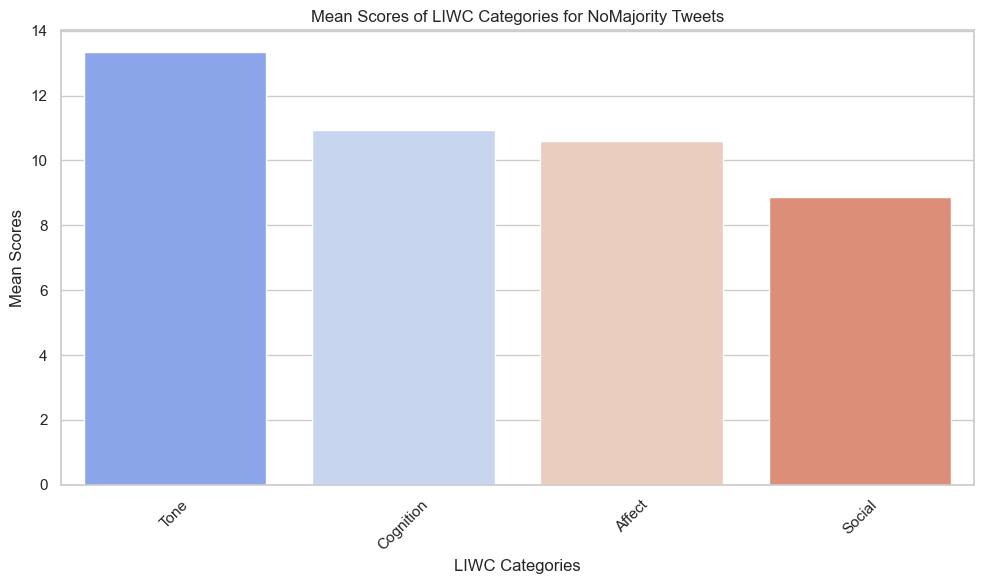

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a list of categories and their means
categories = ['Tone', 'Cognition', 'Affect', 'Social']
means = [13.34, 10.95, 10.60, 8.86]

# Create a bar plot for the mean scores of LIWC categories
plt.figure(figsize=(10, 6))
sns.barplot(x=categories, y=means, palette='coolwarm')
plt.title('Mean Scores of LIWC Categories for NoMajority Tweets')
plt.xlabel('LIWC Categories')
plt.ylabel('Mean Scores')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('liwc_categories_means.png')
plt.show()

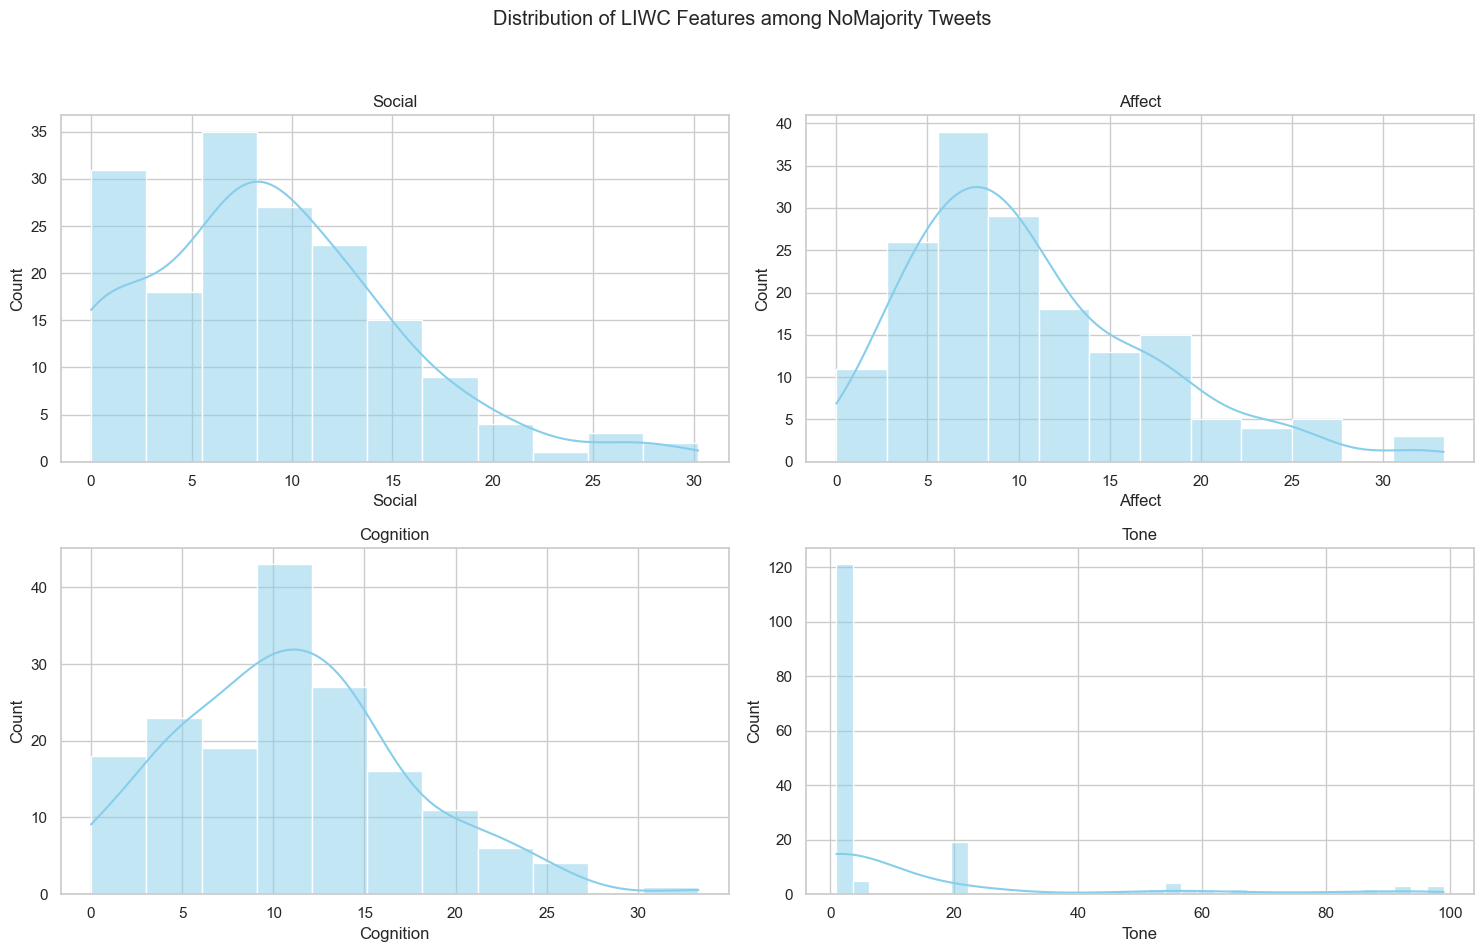

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create histograms for each relevant category
categories = ['Social', 'Affect', 'Cognition', 'Tone']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of LIWC Features among NoMajority Tweets')

for i, cat in enumerate(categories):
    row = i // 2
    col = i % 2
    sns.histplot(no_majority_df[cat], ax=axs[row, col], kde=True, color='skyblue')
    axs[row, col].set_title(cat)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [6]:
# Selecting a subset of interesting LIWC features for further exploration
features_to_explore = ['emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'work', 'leisure', 'money', 'health', 'mental']

# Calculating the mean of these features for 'NoMajority' tweets
descriptive_stats_subset = no_majority_df[features_to_explore].describe().transpose()

print(descriptive_stats_subset)

           count      mean       std  min   25%    50%    75%    max
emo_pos    168.0  0.672857  1.553149  0.0  0.00  0.000   0.00   8.89
emo_neg    168.0  5.824464  4.943077  0.0  2.38  4.705   8.04  25.00
emo_anx    168.0  4.069405  4.935631  0.0  0.00  2.665   5.88  25.00
emo_anger  168.0  0.301667  1.173602  0.0  0.00  0.000   0.00   8.00
emo_sad    168.0  0.574048  1.521286  0.0  0.00  0.000   0.00  10.00
work       168.0  1.358214  2.510286  0.0  0.00  0.000   2.38  18.18
leisure    168.0  0.469048  1.907908  0.0  0.00  0.000   0.00  16.13
money      168.0  0.495774  1.493881  0.0  0.00  0.000   0.00   9.09
health     168.0  8.880060  6.044004  0.0  4.97  8.330  11.76  36.84
mental     168.0  3.431190  3.385370  0.0  0.00  2.780   5.21  18.18


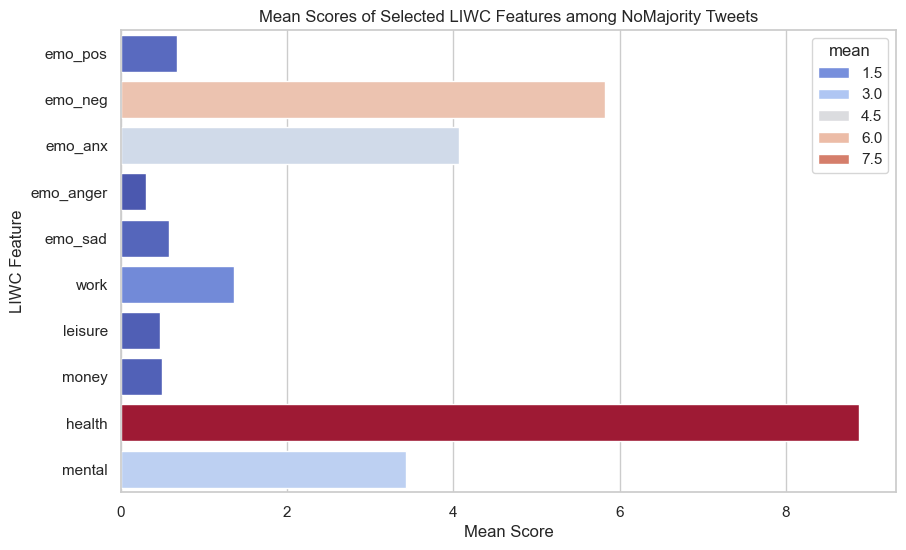

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting mean scores for visualization
mean_scores = descriptive_stats_subset['mean']

# Creating a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='coolwarm',hue=mean_scores)
plt.title('Mean Scores of Selected LIWC Features among NoMajority Tweets')
plt.xlabel('Mean Score')
plt.ylabel('LIWC Feature')
plt.show()

d:\Library\Downloads\Documents\School\SUPSI_23-24\hackathon_2\project\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


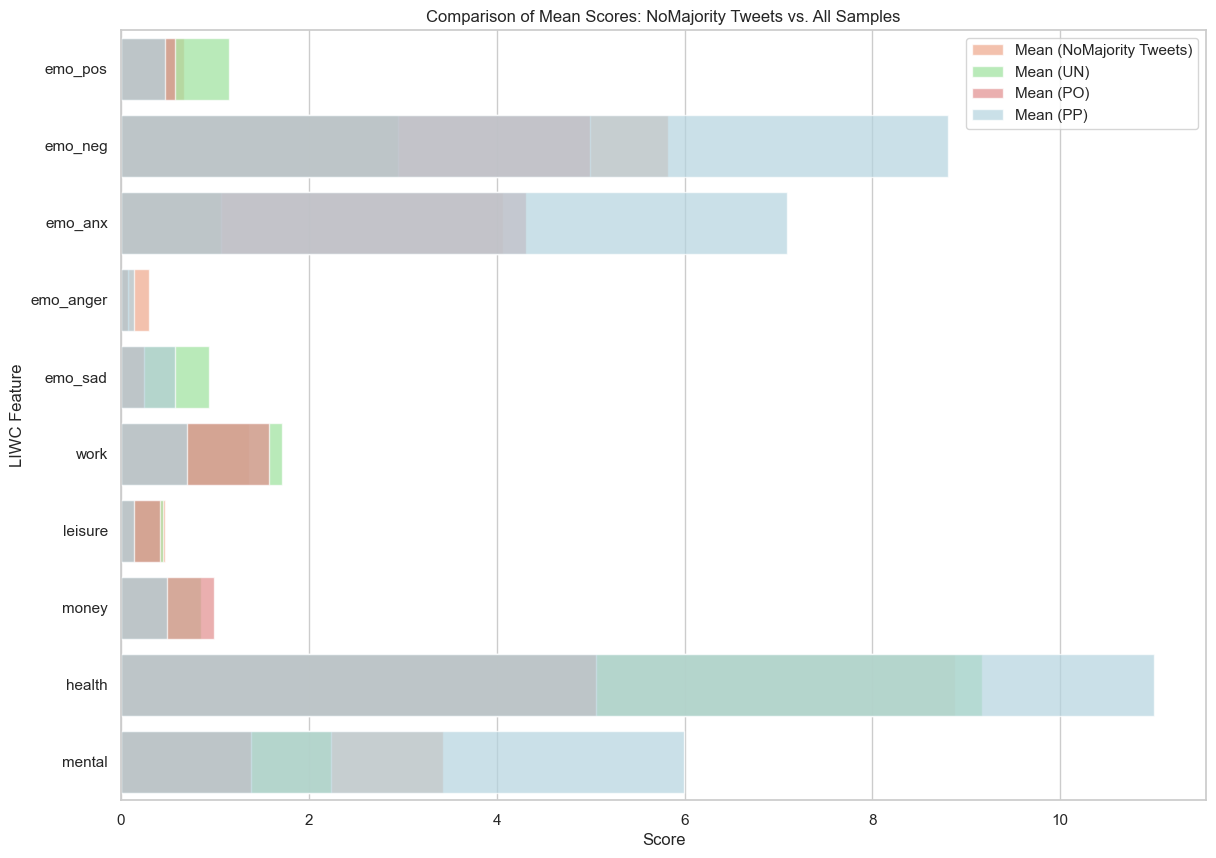

In [19]:
# Load the datasets
model_annotations_df = pd.read_excel('data/model_annotations_liwc_h.xlsx')
r1_r2_annotations_df = pd.read_excel('data/r1_r2_annotations_liwc_h.xlsx')

# Combine both datasets to analyze all samples
po_df = r1_r2_annotations_df[r1_r2_annotations_df['majority_vote'] == 'PO']
pp_df = r1_r2_annotations_df[r1_r2_annotations_df['majority_vote'] == 'PP']
un_df = r1_r2_annotations_df[r1_r2_annotations_df['majority_vote'] == 'UN']

# Selecting the same subset of interesting LIWC features for further exploration
features_to_explore = ['emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'work', 'leisure', 'money', 'health', 'mental']

# Calculating the mean of these features for all samples
descriptive_stats_PO = po_df[features_to_explore].describe().transpose()
descriptive_stats_PP = pp_df[features_to_explore].describe().transpose()
descriptive_stats_UN = un_df[features_to_explore].describe().transpose()

mean_scores_all_PO = descriptive_stats_PO['mean']
mean_scores_all_PP = descriptive_stats_PP['mean']
mean_scores_all_UN = descriptive_stats_UN['mean']

# Visualizing the comparison of min and max scores between 'NoMajority' tweets and all samples
plt.figure(figsize=(14, 10))

sns.barplot(x=mean_scores.values, y=mean_scores.index, color='lightsalmon', label='Mean (NoMajority Tweets)', alpha=0.7)
sns.barplot(x=mean_scores_all_UN.values, y=mean_scores_all_UN.index, color='lightgreen', label='Mean (UN)', alpha=0.7)
sns.barplot(x=mean_scores_all_PO.values, y=mean_scores_all_PO.index, color='lightcoral', label='Mean (PO)', alpha=0.7)
sns.barplot(x=mean_scores_all_PP.values, y=mean_scores_all_PP.index, color='lightblue', label='Mean (PP)', alpha=0.7)

# Use a different color for 'NoMajority Tweets'

plt.title('Comparison of Mean Scores: NoMajority Tweets vs. All Samples')
plt.xlabel('Score')
plt.ylabel('LIWC Feature')
plt.legend()
plt.show()


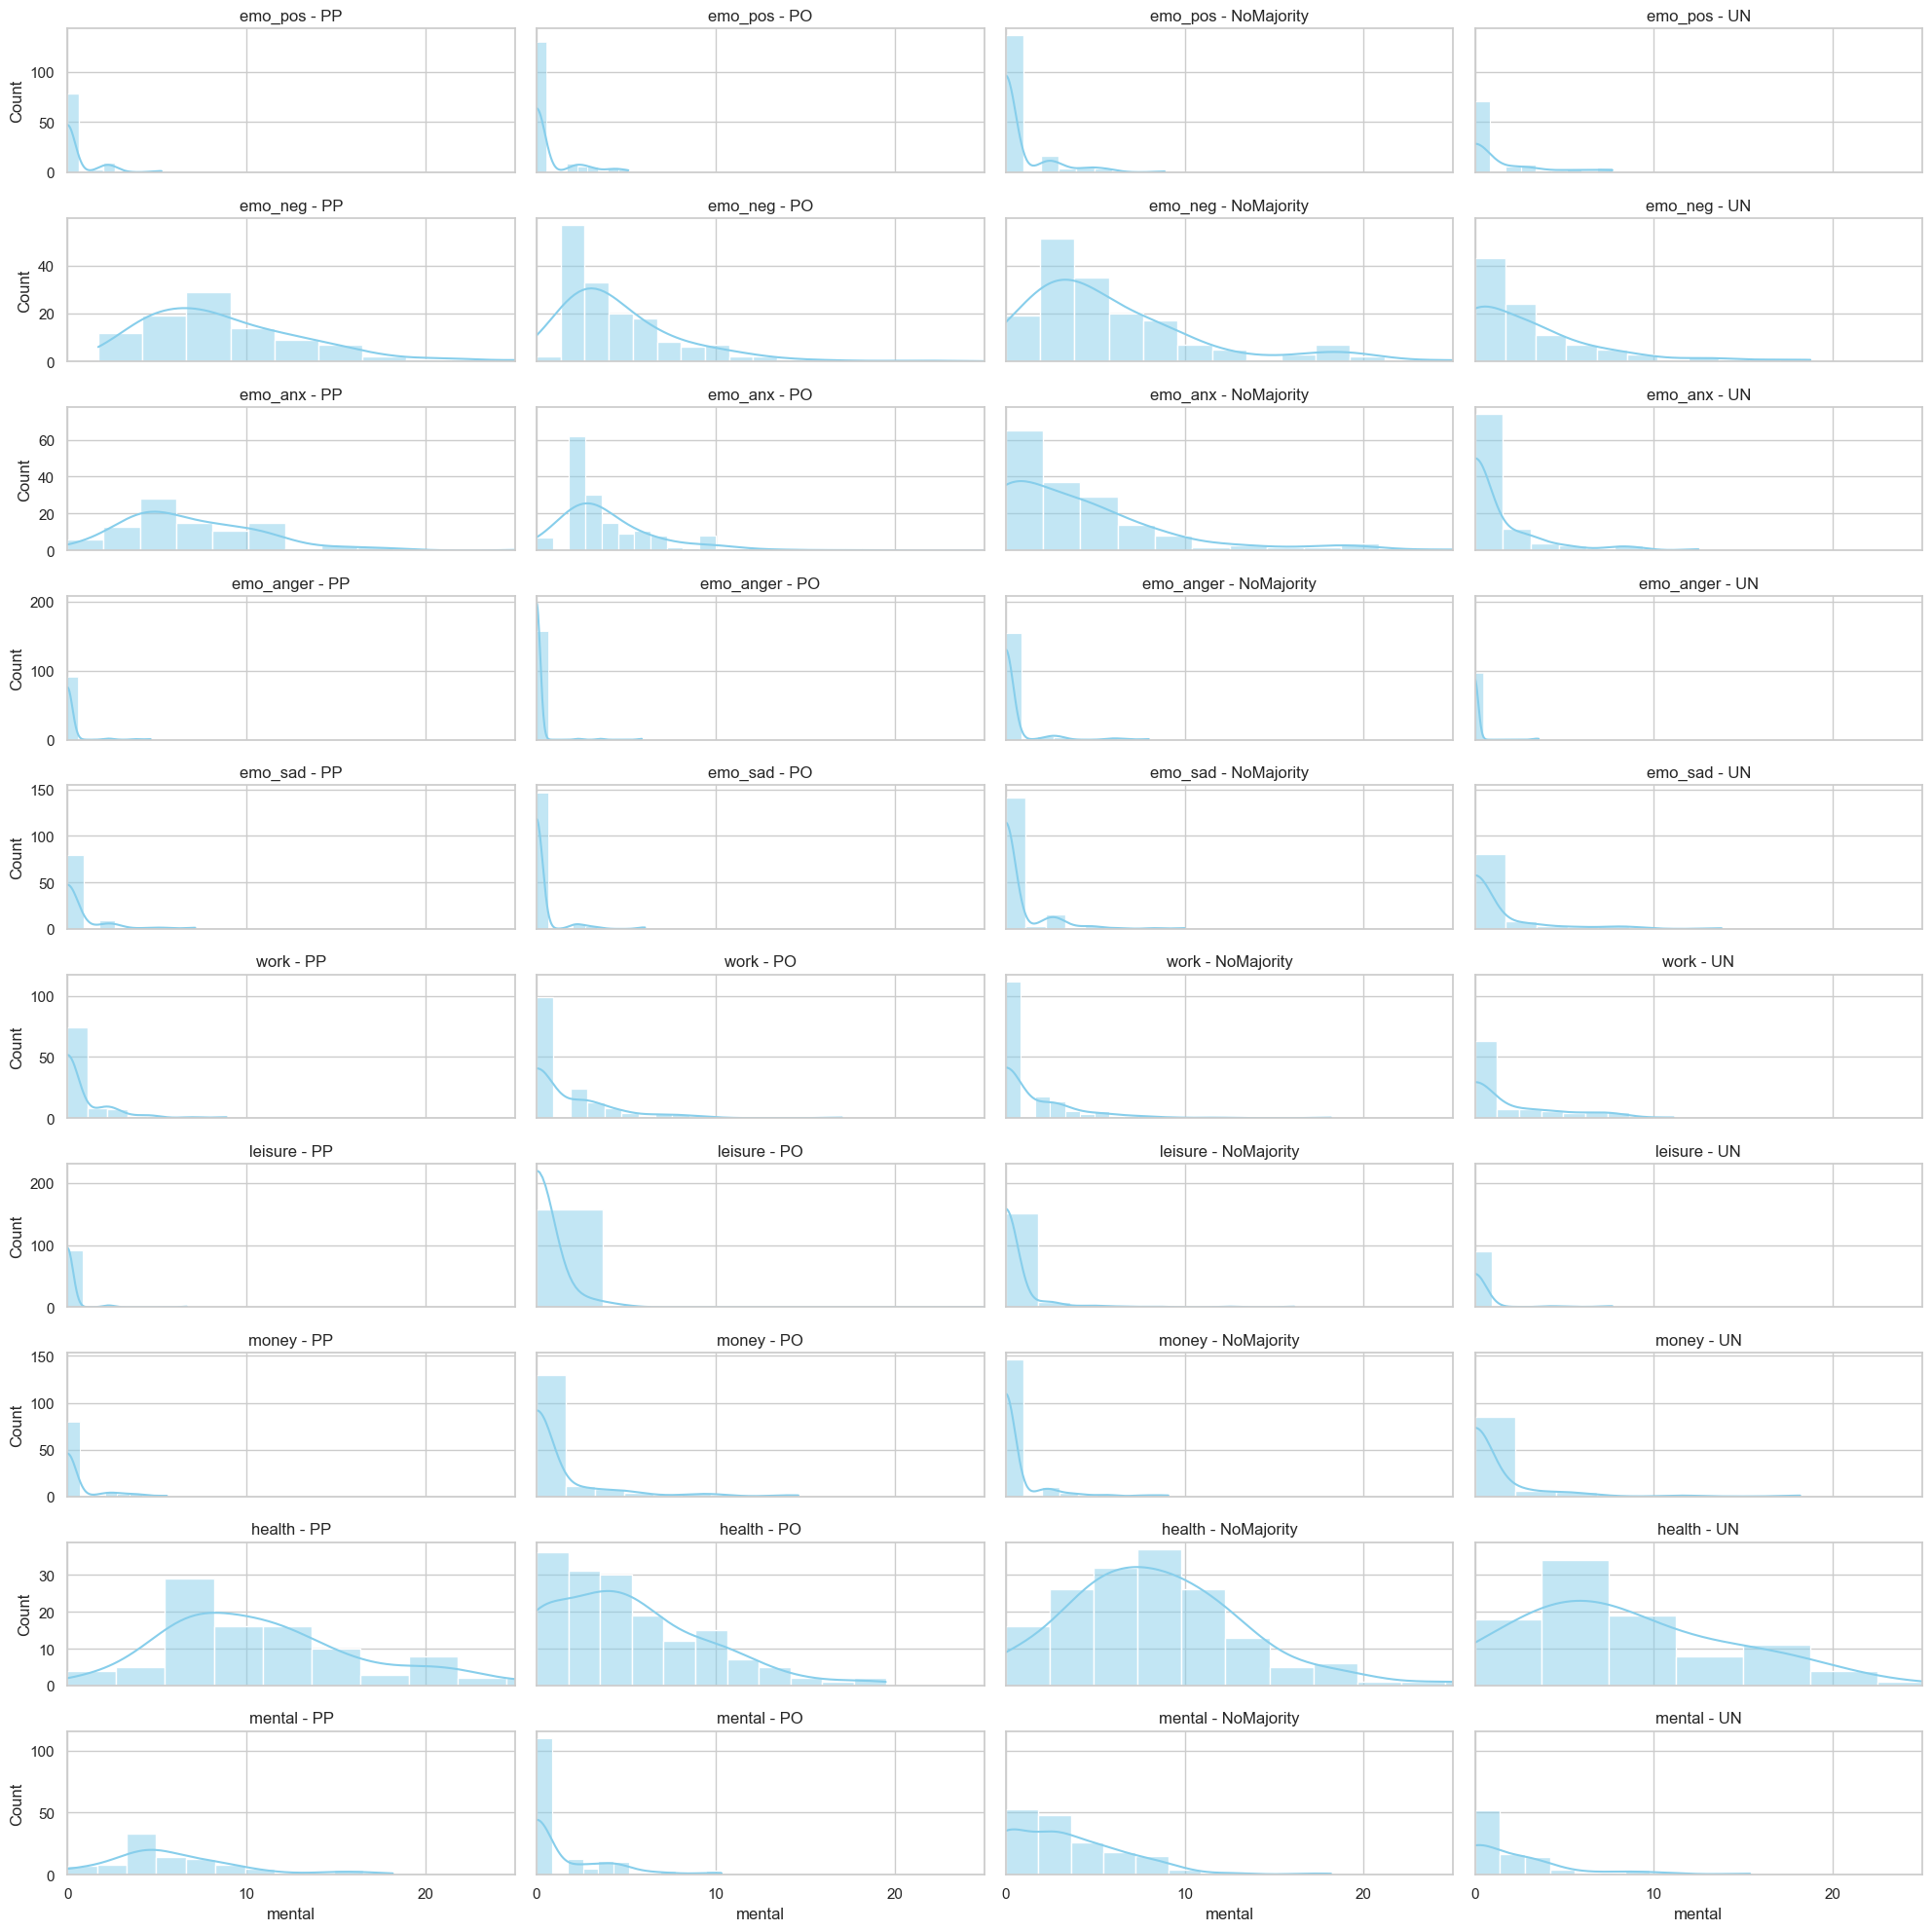

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset again for clarity
all_samples_df = pd.read_excel('data/r1_r2_annotations_liwc_h.xlsx')

# Define the features to plot
features_to_plot = ['emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 'work', 'leisure', 'money', 'health', 'mental']

# Define the target classes
targets = all_samples_df['majority_vote'].unique()

# Plotting
fig, axes = plt.subplots(len(features_to_plot), len(targets), figsize=(20, 20), sharex=True, sharey='row')

for i, feature in enumerate(features_to_plot):
    for j, target in enumerate(targets):
        sns.histplot(all_samples_df[all_samples_df['majority_vote'] == target][feature], kde=True, ax=axes[i, j], color='skyblue')
        axes[i, j].set_title(f'{feature} - {target}')
        axes[i, j].set_xticks(np.arange(0, 25, 10))
        axes[i, j].set_xlim(0, 25)

plt.tight_layout()
plt.show()